# データの水増し
過学習対策に。

## コード例
CIFAR10の画像に対して水増し画像を生成する。KerasのImageDataGeneratorを利用する。

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def genShowImg(X=None, Y=None):
    plt.figure(figsize=(10, 8))
    for i in range(len(X)):
        gen_img = X[i].astype(np.uint8)
        plt.subplot(10, 1 + len(X)/10, i + 1)
        plt.imshow(gen_img)
        tname = "lbl: " + str(Y[i])
        plt.title(tname)
        plt.axis('off')
    plt.show()

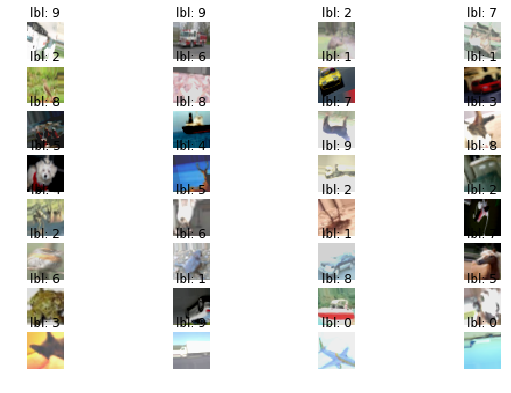

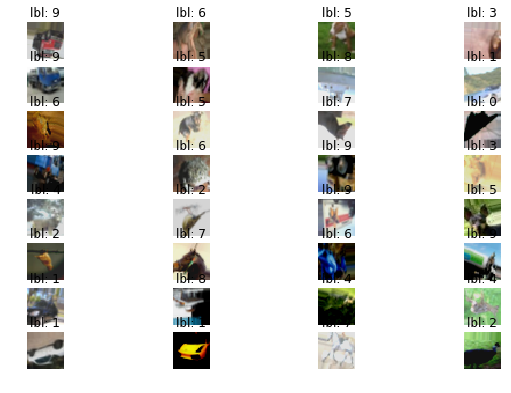

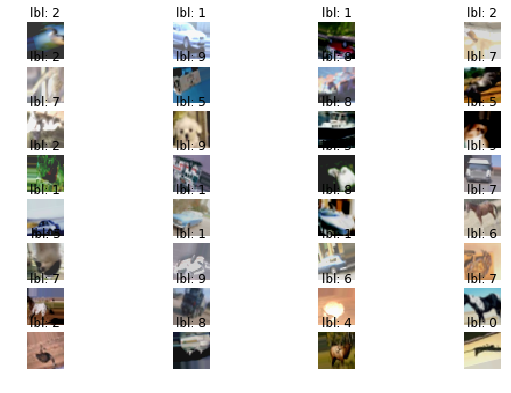

In [5]:
data_dic = unpickle('./cnn_cifar10/cifar-10-batches-py/data_batch_1')
X = data_dic[b'data']
Y = data_dic[b'labels']
Xname = data_dic[b'filenames']

datagen = image.ImageDataGenerator(
                                   rotation_range=20,
                                   vertical_flip=True,
                                   horizontal_flip=True,
                                   height_shift_range=0.2,
                                   width_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   brightness_range=[0.8, 1.0],
                                   channel_shift_range=100.,
                                   )

Xreshape = X.reshape(-1,3,32,32).transpose(0,2,3,1)
genIdx = 0
MaxGen= 3
for x_batch, y_batch in datagen.flow(Xreshape, Y, batch_size=32):
    genShowImg(x_batch, y_batch)
    genIdx += 1
    if genIdx >= MaxGen: break

# 参考
Kerasでデータ拡張(Data Augmentation)後の画像を表示する,https://qiita.com/takurooo/items/c06365dd43914c253240